# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание
1. [Изучение общей информации](#info)
2. [Предобработка данных](#preprocessing)
3. [Добавление в таблицу данных](#add)
4. [Исследовательский анализ данных](#analysis)
5. [Общий вывод](#conclusion) 

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a class="anchor" id="info"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
display(real_estate.sample(10))
display(real_estate.describe().T)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10166,14,4900000.0,36.3,2018-04-05T00:00:00,1,2.50,12.0,19.0,10,False,...,8.0,1.0,Санкт-Петербург,51848.0,13846.0,0.0,NaN,1.0,651.0,NaN
7136,0,48000000.0,108.0,2018-02-01T00:00:00,3,NaN,5.0,61.0,2,NaN,...,13.5,NaN,Санкт-Петербург,24632.0,3180.0,1.0,551.0,3.0,415.0,144.0
2174,8,3300000.0,45.6,2017-09-27T00:00:00,2,2.60,9.0,28.0,1,NaN,...,8.5,NaN,посёлок Шушары,24150.0,29936.0,0.0,NaN,0.0,NaN,136.0
20218,12,3950000.0,56.0,2018-02-20T00:00:00,2,2.70,16.0,26.8,7,NaN,...,19.9,1.0,деревня Колтуши,NaN,NaN,NaN,NaN,NaN,NaN,197.0
3939,7,1860000.0,51.8,2018-07-02T00:00:00,2,NaN,5.0,29.0,5,NaN,...,9.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,279.0
6131,5,2550000.0,32.4,2017-10-02T00:00:00,1,NaN,9.0,17.8,7,NaN,...,6.0,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,153.0
10128,10,2900000.0,39.0,2015-11-20T00:00:00,1,NaN,14.0,16.0,5,NaN,...,17.0,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,441.0
4011,4,3850000.0,43.4,2018-04-02T00:00:00,2,2.50,5.0,27.4,3,NaN,...,5.5,1.0,Санкт-Петербург,38775.0,12472.0,1.0,355.0,0.0,NaN,137.0
20119,20,3900000.0,44.8,2017-12-07T00:00:00,2,2.56,5.0,28.7,5,NaN,...,5.4,NaN,Петергоф,36382.0,31571.0,3.0,54.0,3.0,371.0,125.0
9868,18,11305000.0,119.0,2018-07-01T00:00:00,3,3.00,6.0,60.9,3,NaN,...,14.9,NaN,Санкт-Петербург,53364.0,17858.0,0.0,NaN,2.0,370.0,90.0


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [3]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Каждая строка таблицы - объявление о продаже квартиры. <br>
В наших данных множество столбцов с пропущенными значениями. Многие пропущенные значения можно объяснить тем фактом, что пользователи не указывают различные параметры недвижимости: высота потолков, количество балконов. Столбцы с информацией о расстоянии до ближайшего аэропорта и центра города, а также с информацией о числе парков заполняются автоматически на основе картографических карт. Пропущенные значения в таких столбцах можно объяснить следствием технологической ошибки. <br>
Очень смущают максимальные значения цены недвижимости (763млн), общей площади (900кв.м) и высоты потолков (100м). <br>
Минимальные значения также далеки от реальности: цена 12тыс. за недвижимость, потолок высотой 1м, продажа недвижимости состоятась за 1 день (или собственник передумал и снял объявление о продаже?) <br>
Средние значения выглядят вполне правдободобно.

### Шаг 2. Предобработка данных <a class="anchor" id="preprocessing"></a>

In [4]:
(real_estate.isna().sum() / len(real_estate) * 100).sort_values(ascending = False)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
ponds_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

В наших данных более 80% пропущенных значений в информации является ли объект апартаментами. Если в данных не указано обратное (есть информация о том, что данный объект - апартаменты), будем считать данный объект жилым фондом (следовательно, для таких объектов укажем значение False).

In [5]:
real_estate['is_apartment'] = real_estate['is_apartment'].fillna(False)

In [6]:
real_estate['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Максимальное число балконов: 5, выглядит правдоподобно. В случае, если значение в информации о числе балконов отсутствует, будем считать, что балконов нет, такие значения заменим на 0.

In [7]:
real_estate['balcony'] = real_estate['balcony'].fillna(0)

В наших данных есть пропущенные значения в информации об этажности дома. Предположим, что есть значение отсутствует, то квартира находится на последнем этаже дома и собственник квартиры просто не стал указывать это дважды. Так как таких значений всего 86, их замена не повлияет на общие выводы.

In [8]:
real_estate.loc[real_estate['floors_total'].isna(), 'floors_total'] = real_estate['floor']

days_exposition - сколько дней было размещено объявление (от публикации до снятия). Отсутствие данных в нашем датасете можно объяснить технологической ошибкой. Отказаться от таких объявлений мы не можем, т.к. они составляют около 13% всех наших данных. Так как у нас нет возможности уточнить у разработчиков, чем вызвано отсутствие данных, заполним пропущенные значения медианой.

In [9]:
display((len(real_estate.loc[real_estate['days_exposition'].isna()]) / len(real_estate)) * 100)

13.422507278788135

Сегодня нормой в России считается высота потолка 2.4 - 2.7 метра. Заменим пропущенные значения высоты потолков на медианные. 

In [10]:
display(real_estate['ceiling_height'].median())
ceiling_height_median = real_estate['ceiling_height'].median()
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(ceiling_height_median)

2.65

Посмотрим на данные о наименовании населенных пунктов

In [11]:
real_estate['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

В названии населенных пунктов встречаются поселки. В каких-то случаях пишут через е, в других - через "ё". Заменим букву ё на е, чтобы избежать возможных дубликатов, и проверим произошла ли замена.

In [12]:
real_estate['locality_name'] = real_estate['locality_name'].str.replace('ё','е')
real_estate['locality_name'].unique().tolist()

['Санкт-Петербург',
 'поселок Шушары',
 'городской поселок Янино-1',
 'поселок Парголово',
 'поселок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'деревня Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'поселок Металлострой',
 'поселок городского типа Лебяжье',
 'поселок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'поселок Аннино',
 'поселок городского типа Ефимовский',
 'поселок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'поселок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'поселок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Шлиссель

In [13]:
type_list = ['поселок ', 'городской ', 'коттеджный ', 'деревня ', 'типа ', 'садоводческое', 'некоммерческое', 'при ', 
             'железнодорожной ', 'садовое ', 'товарищество ', 'село ', 'городского ', 'станции ']
for i in type_list:
    real_estate['locality_name'] = real_estate['locality_name'].str.replace(i, '')

In [14]:
real_estate['locality_name'].unique().tolist()

['Санкт-Петербург',
 'Шушары',
 'Янино-1',
 'Парголово',
 'Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'Кудрово',
 'Коммунар',
 'Колпино',
 'Красный Бор',
 'Гатчина',
 'Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'Новое Девяткино',
 'Металлострой',
 'Лебяжье',
 'Сиверский',
 'Молодцово',
 'Кузьмоловский',
 'Новая Ропша',
 'Павловск',
 'Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'Куттузи',
 'Аннино',
 'Ефимовский',
 'Плодовое',
 'Заклинье',
 'Торковичи',
 'Первомайское',
 'Красное Село',
 'Понтонный',
 'Сясьстрой',
 'Старая',
 'Лесколово',
 'Новый Свет',
 'Сланцы',
 'Путилово',
 'Ивангород',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'Оржицы',
 'Кальтино',
 'Романовка',
 'Бугры',
 'Рощино',
 'Кириши',
 'Луга',
 'Волосово',
 'Отрадное',
 'Павлово',
 'Оредеж',
 'Копорье',
 'Молодежное',
 'Тихвин',
 'Победа',
 'Нурма',
 'Синявино',
 'Тосно',
 'Стрельна',
 'Бокситогорск',
 'Александровская',
 'Лопухинка'

Приведем дату публикации first_day_exposition к формату даты.

In [15]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format = '%Y-%m-%d')

Измением значения об этажности дома, числе балконов и количестве дней размещения объявления на целочисленный тип данных.

In [16]:
for column in ['floors_total', 'balcony', 'total_images', 'floor']:
    real_estate[column] = real_estate[column].astype('int8')

In [70]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_category,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,nan,nan
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.32,0.41


In [71]:
real_estate.info()                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int8
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int8
living_area             21796 non-null float64
floor                   23699 non-null int8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [74]:
real_estate['cityCenters_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

## Вывод
Заменили пропущенные значения в столбцах о количестве балконов, информации о том, является ли объект апартаментами, об этажности дома. Заменили значения об этажности дома, количестве балконов и количестве дней размещения объявления на целочисленный тип данных. Привели данные о дате публикации объявления в формат даты.

### Шаг 3. Посчитайте и добавьте в таблицу <a class="anchor" id="add"></a>

**Цена квадратного метра**

In [17]:
real_estate['price_per_meter'] = real_estate['last_price'] / real_estate['total_area'] 
# поделим стоимость квартиры на площадь квартиры
real_estate['price_per_meter'] = real_estate['price_per_meter'].apply('{0:.2f}'.format)
# выводим значение с заданной точностью: до 2х знаков после запятой
real_estate['price_per_meter'] = pd.to_numeric(real_estate['price_per_meter'], errors='coerce')

**День недели, месяц и год публикации объявления**

In [18]:
real_estate['day_week'] = real_estate['first_day_exposition'].dt.weekday # день недели
real_estate['month'] = real_estate['first_day_exposition'].dt.month # месяц
real_estate['year'] = real_estate['first_day_exposition'].dt.year # год

**Этаж квартиры**

In [19]:
# распределение квартир в зависимости от этажа
def floor(value): 
    if value['floor'] == 1: # если этаж 1 - функция вернет "первый"
        return 'первый'
    elif value['floor'] == value['floors_total']: # этаж квартиры равен этажности дома - функция вернет "последний"
        return 'последний'
    else:
        return 'другой' # в противном случае - "другой"

In [20]:
real_estate['floor_category'] = real_estate.apply(floor, axis = 1) 
# заполняем столбец обработанными значениями-результатами работы функции floor с помощью метода apply

**Соотношение жилой и общей площади квартиры**

In [21]:
real_estate['living_to_total'] = real_estate['living_area'] / real_estate['total_area']
real_estate['living_to_total'] = real_estate['living_to_total'].apply('{0:.2f}'.format)

**Соотношение площади кухни к общей площади квартиры**

In [22]:
real_estate['kitchen_to_total'] = real_estate['kitchen_area'] / real_estate['total_area']
real_estate['kitchen_to_total'] = real_estate['kitchen_to_total'].apply('{0:.2f}'.format)

In [23]:
real_estate.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_category,living_to_total,kitchen_to_total
16060,10,4100000.0,45.6,2017-11-29,2,2.65,9,28.4,8,False,...,1.0,847.0,185.0,89912.28,2,11,2017,другой,0.62,0.16
5583,5,2190000.0,32.0,2016-06-09,1,2.65,5,15.0,3,False,...,NaN,NaN,54.0,68437.50,3,6,2016,другой,0.47,0.22
16261,4,6500000.0,68.0,2019-03-31,3,3.20,4,46.0,2,False,...,1.0,81.0,NaN,95588.24,6,3,2019,другой,0.68,0.18


## Вывод
Добавили данные о цене квадратного метра, соотношении жилой и общей площади, площади кухни к общей площади. Добавили 3 столбца: день недели, месяц и год публикации объявления. Проверили категоризацию квартир в зависимости от этажа.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a class="anchor" id="analysis"></a>

- **Изучение параметра: площадь квартиры**

In [24]:
real_estate['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

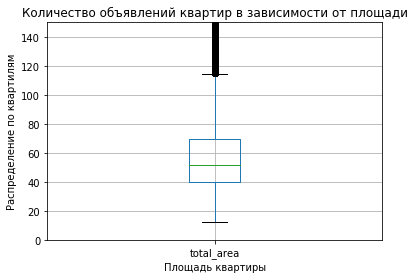

In [25]:
data_plot = real_estate[['total_area']]
data_plot.boxplot()
plt.title('Количество объявлений квартир в зависимости от площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Распределение по квартилям')
plt.ylim(0, 150)
plt.show()

- Минимальное значение - мы видим, что минимальное значение по нашей выборке примерно 12кв.м.
- Нижний квартиль - 25 % нашей выборки находится в пределах 40кв.м.
- Медиана - 50 % выборки, разделяет выборку на 2 равные части и равна 52 кв.м.
- Верхний квартиль равен 69.9кв.м.
- Максимальное значение площади квартиры равно 900кв.м.

Посмотрим, как распределены данные в разных диапазонах. С целью оптимизации данного процесса напищем функцию **func_hist**, у которой будет 5 аргументов: 
- диапазон значений;
- параметр, который изучаем;
- наименование гистограммы;
- название оси х;
- название оси y

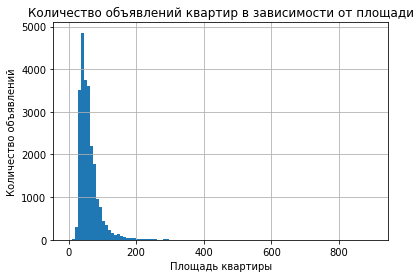

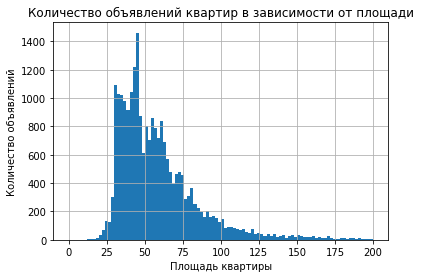

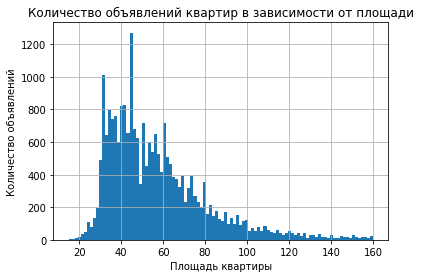

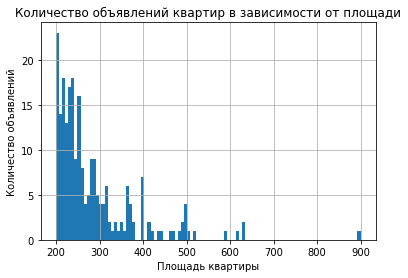

In [26]:
range_hist = [(0, 900), (0, 200), (15, 160), (200, 900)]
def func_hist (range_hist, col, title, xname, yname):
    for elem in range_hist:
        x, y = elem
        real_estate[col].hist(bins=100, range = (x, y))
        plt.title(title)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.show()
func_hist(range_hist, 'total_area', 'Количество объявлений квартир в зависимости от площади', 
          'Площадь квартиры', 'Количество объявлений')

In [27]:
display(len(real_estate.loc[real_estate['total_area'] <= 20]))
display(len(real_estate.loc[real_estate['total_area'] >= 200]))

35

231

Большинство значений лежит в диапазоне от 20 до 200. Всего 35 объявлений с площадью менее 20кв.м. и 231 объявление с площадью более 200кв.м. Небольшая часть данных по отношению к общему объему. Среднее значение равное 60 выглядит правдоподобно. Стандартное отклонение составило 35, что говорит о том, что площадь квартиры в среднем отклоняется на величину 35 от среднего значения. Смущают также минимальные и максимальные значения равные 12 и 900 соответственно. Будем считать, что выбивающиеся значения по площади квартиры: менее 20кв.м. и более 200кв.м.

- **Изучение параметра: цена квартиры**

In [28]:
real_estate['last_price'].describe().apply('{0:.5f}'.format)

count        23699.00000
mean       6541548.77155
std       10887013.26754
min          12190.00000
25%        3400000.00000
50%        4650000.00000
75%        6800000.00000
max      763000000.00000
Name: last_price, dtype: object

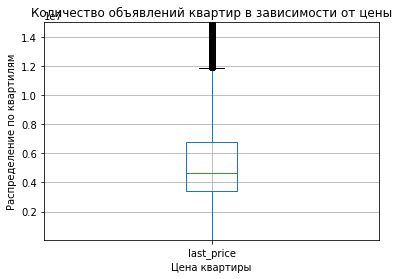

In [29]:
data_plot = real_estate[['last_price']]
data_plot.boxplot()
plt.title('Количество объявлений квартир в зависимости от цены')
plt.xlabel('Цена квартиры')
plt.ylabel('Распределение по квартилям')
plt.ylim(50000, 15000000)
plt.show()

- Минимальное значение цены квартиры равно 12190
- Нижний квартиль - 25 % нашей выборки находится в пределах 3400000
- Медиана - 50 % выборки, разделяет выборку на 2 равные части и равна 4650000 (выглядит правдоподобно)
- Верхний квартиль равен 6800000
- Максимальное значение цены квартиры равно 763000000 (сильно отличается от среднего)

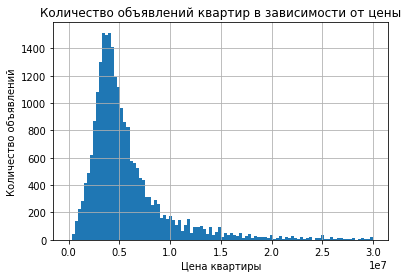

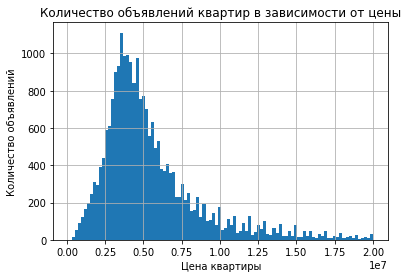

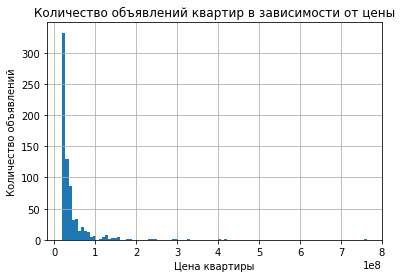

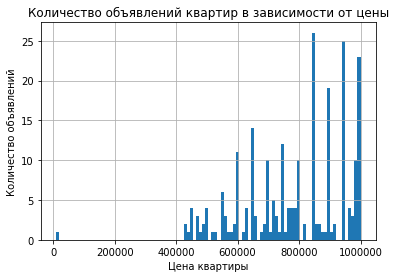

In [30]:
range_hist = [(12000, 30000000), (100000,20000000), (20000000,763000000), (10000, 1000000)]
func_hist(range_hist, 'last_price', 'Количество объявлений квартир в зависимости от цены', 
          'Цена квартиры', 'Количество объявлений')

In [31]:
display(len(real_estate.loc[real_estate['last_price'] >= 20000000]))
display(len(real_estate.loc[real_estate['last_price'] <= 500000]))

723

18

Большая часть значений находится в диапазоне от 500000 до 20 млн, что выглядит правдоподобно. Минимум равен 12190, что не может быть правдой. Средняя стоимость квартиры равна 6,5млн. Выбивающиеся значения по цене квартиры: менее 500т. и более 20млн

- **Изучение параметра: число комнат**

In [32]:
real_estate['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

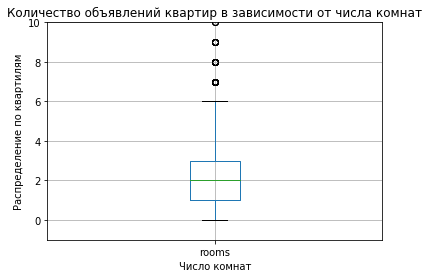

In [33]:
data_plot = real_estate[['rooms']]
data_plot.boxplot()
plt.title('Количество объявлений квартир в зависимости от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Распределение по квартилям')
plt.ylim(-1, 10)
plt.show()

- Минимальное значение числа комнат равно 0 (возможно данные объекты недвижимости являются студиями, и кол-во комнат там не указываются)
- Нижний квартиль - 25 % нашей выборки равен 1й комнате
- Медиана - 50 % выборки, разделяет выборку на 2 равные части и равна 2м комнатам
- Верхний квартиль - 3 комнаты
- Максимальное значение числа комнат равно 19

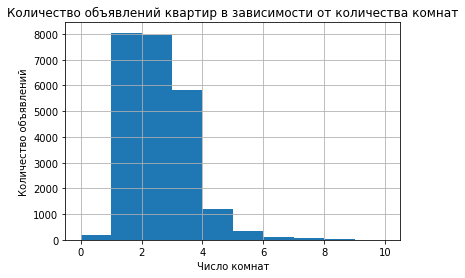

In [34]:
real_estate['rooms'].hist(bins=10, range = (0,10))
plt.title('Количество объявлений квартир в зависимости от количества комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество объявлений')
plt.show()

Самые популярные квартиры: однокомнатные, двухкомнатные (примерно одинаковое кол-во с однокомнатными) и трехкомнатные. Диапазон для анализа: 1-8 комнат

- **Изучение параметра: высота потолков**

In [35]:
real_estate['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

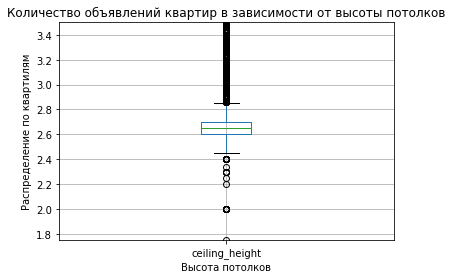

In [36]:
data_plot = real_estate[['ceiling_height']]
data_plot.boxplot()
plt.title('Количество объявлений квартир в зависимости от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Распределение по квартилям')
plt.ylim(1.75, 3.5)
plt.show()

- Минимальное значение высоты потолков равно 1м, что крайне мал для квартиры
- Нижний квартиль - 25 % нашей выборки равен 2.6м
- Медиана - 50 % выборки, разделяет выборку на 2 равные части и равна 2.65м (выглядит правдоподобно) 
- Верхний квартиль - 2.7м
- Максимальное значение высоты потолков 100м (аномалия)

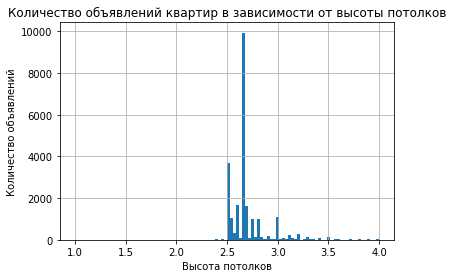

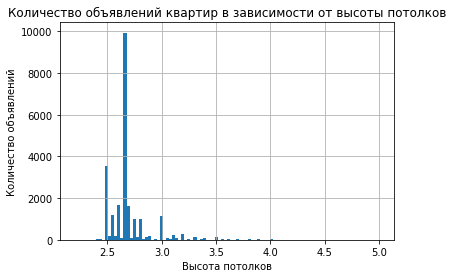

In [37]:
range_hist = [(1,4), (2.2,5)]
func_hist(range_hist, 'ceiling_height', 'Количество объявлений квартир в зависимости от высоты потолков', 
          'Высота потолков', 'Количество объявлений')

In [38]:
len(real_estate.loc[real_estate['ceiling_height']>=4])

114

Большинство значений лежит в диапазоне от 2 до 4 метров, что выглядит правдоподобно. Выбивающиеся значения по высоте потолков: менее 2 и более 4 метров.

- **Изучение параметра: время продажи квартиры**

In [39]:
real_estate['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

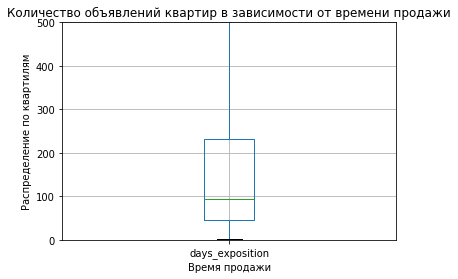

In [40]:
data_plot = real_estate[['days_exposition']]
data_plot.boxplot()
plt.title('Количество объявлений квартир в зависимости от времени продажи')
plt.xlabel('Время продажи')
plt.ylabel('Распределение по квартилям')
plt.ylim(0, 500)
plt.show()

- Минимальное значение высоты потолков равно 1 дню (можно предположить, что собственник жилья передумал продавать недвижимость и снял объявление через день после публикации)
- Нижний квартиль - 25 % нашей выборки равен 45 дням
- Медиана - 50 % выборки, разделяет выборку на 2 равные части и равна 95 дням (примерно 3 месяца)
- Верхний квартиль - 232 дня
- Максимальное значение высоты потолков 1580 дней (более 4 лет)

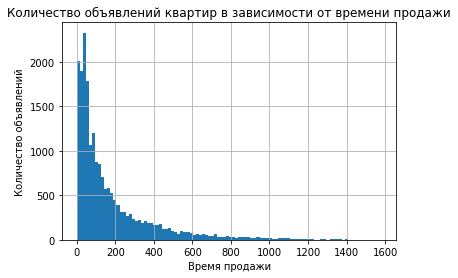

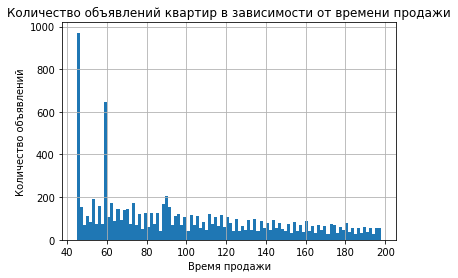

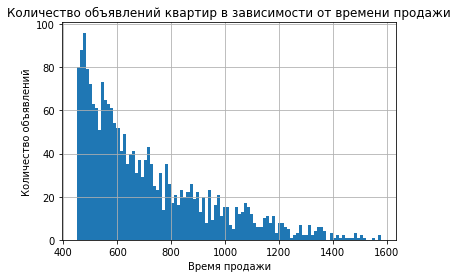

In [41]:
range_hist = [(1,1580), (45,198), (450,1580)]
func_hist(range_hist, 'days_exposition', 'Количество объявлений квартир в зависимости от времени продажи', 
          'Время продажи', 'Количество объявлений')

In [42]:
display(real_estate['days_exposition'].mean())
display(real_estate['days_exposition'].median())

180.88863436982163

95.0

In [43]:
display(len(real_estate.loc[real_estate['days_exposition'] >= 900]))
display(len(real_estate.loc[real_estate['days_exposition'] <= 7]))

413

848

Среднее значение по времени продажи квартиры - 169 дней, медиана - 95 дней. Продажа квартиры - довольно длительный процесс, обычно на продажу квартиры уходит около 100 дней. Если квартира была продана менее, чем за 7 дней - это очень быстрая продажа (возможен и другой вариант: собственник квартиры передумал продавать недвижимость и снял объявление). В случае, если квартиру продали более, чем за 900 дней - это необычно долгая продажа.

**Уберем редкие и выбивающиеся значения.** Для этого применим метод **query**

In [44]:
total_area_small = 20
total_area_big = 200
last_price_small = 500000
last_price_big = 20000000
rooms_big = 8
ceiling_height_small = 2
ceiling_height_big = 4
real_estate_clean = real_estate.copy
real_estate_clean = pd.DataFrame(real_estate.query('rooms <= @rooms_big and \
                    @total_area_small <= total_area <= @total_area_big and \
                    @ceiling_height_small <=ceiling_height <= @ceiling_height_big and \
                    @last_price_small <= last_price <= @last_price_big'))
real_estate_clean.shape

(22846, 29)

In [72]:
real_estate_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22846 entries, 0 to 23698
Data columns (total 30 columns):
total_images               22846 non-null int8
last_price                 22846 non-null float64
total_area                 22846 non-null float64
first_day_exposition       22846 non-null datetime64[ns]
rooms                      22846 non-null int64
ceiling_height             22846 non-null float64
floors_total               22846 non-null int8
living_area                21061 non-null float64
floor                      22846 non-null int8
is_apartment               22846 non-null bool
studio                     22846 non-null bool
open_plan                  22846 non-null bool
kitchen_area               20694 non-null float64
balcony                    22846 non-null int8
locality_name              22798 non-null object
airports_nearest           17362 non-null float64
cityCenters_nearest        17379 non-null float64
parks_around3000           17380 non-null float64
parks_ne

In [45]:
# посмотрим, какой процент данных остался после обработки от выбивающихся значений
(len(real_estate_clean) / len(real_estate)) * 100

96.4006920123212

**Факторы, влияющие на стоимость квартиры.** <br>
- **Зависимость цены от квадратного метра**

0.6431598906738568

Text(0, 0.5, 'Цена квартиры')

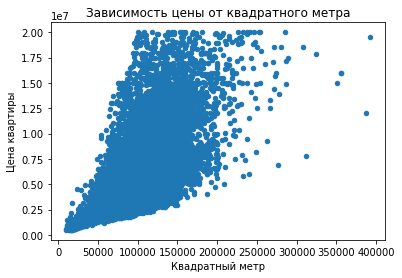

In [46]:
display(real_estate_clean['last_price'].corr(real_estate_clean['price_per_meter']))
data_plot = real_estate_clean.plot(x = 'price_per_meter', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от квадратного метра')
data_plot.set_xlabel('Квадратный метр')
data_plot.set_ylabel('Цена квартиры')

Согласно графику и коэффициенту корреляции связь между ценой и квадратным метром существует. Она хороша прослеживается на графике: чем больше площадь, тем немного выше стоимость

- **Зависимость цены от числа комнат**

0.5019504659627233

Text(0, 0.5, 'Число комнат')

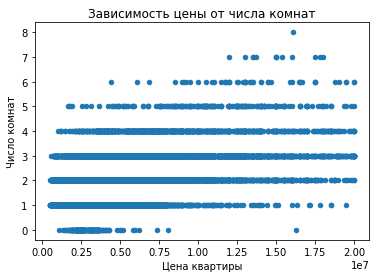

In [47]:
display(real_estate_clean['last_price'].corr(real_estate_clean['rooms']))
data_plot = real_estate_clean.plot(x = 'last_price', y = 'rooms', kind = 'scatter')
plt.title('Зависимость цены от числа комнат')
data_plot.set_xlabel('Цена квартиры')
data_plot.set_ylabel('Число комнат')

По графику и коэффициенту корреляции можно сделать вывод о том, что количество комнат влияет на конечную стоимость квартир

- **Зависимость цены от этажа**

In [48]:
real_estate_clean.pivot_table(index = 'floor_category', values = 'last_price')

,last_price
floor_category,
другой,5.634470e+06
первый,4.397635e+06
последний,5.109491e+06


На первом этаже квартиры стоят дешевле, чем на других

- **Зависимость цены от удаленности от центра**

-0.3568531402458938

Text(0, 0.5, 'Цена квартиры')

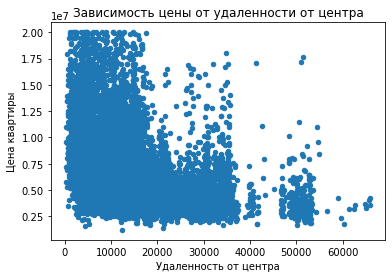

In [49]:
display(real_estate_clean['last_price'].corr(real_estate_clean['cityCenters_nearest']))
data_plot = real_estate_clean.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от удаленности от центра')
data_plot.set_xlabel('Удаленность от центра')
data_plot.set_ylabel('Цена квартиры')

Существует взаимосвязь между расстоянием от центар и ценой. Ближе к центру квартиры дороже.

- **Зависимость цены от даты размещения**

-0.017389286163517863

Text(0, 0.5, 'Цена квартиры')

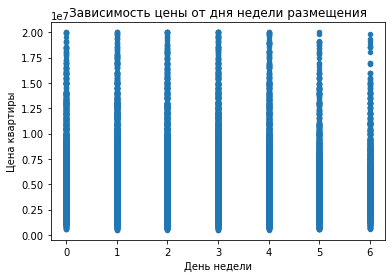

In [50]:
display(real_estate_clean['last_price'].corr(real_estate_clean['day_week']))
data_plot = real_estate_clean.plot(x = 'day_week', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от дня недели размещения')
data_plot.set_xlabel('День недели')
data_plot.set_ylabel('Цена квартиры')

0.0054652333072126875

Text(0, 0.5, 'Цена квартиры')

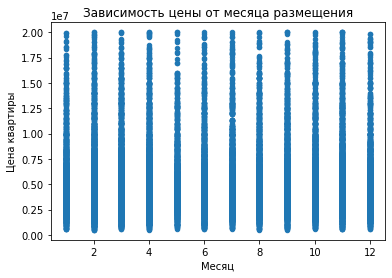

In [51]:
display(real_estate_clean['last_price'].corr(real_estate_clean['month']))
data_plot = real_estate_clean.plot(x = 'month', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от месяца размещения')
data_plot.set_xlabel('Месяц')
data_plot.set_ylabel('Цена квартиры')

-0.02336652053333269

Text(0, 0.5, 'Цена квартиры')

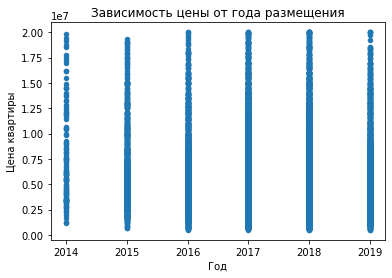

In [52]:
display(real_estate_clean['last_price'].corr(real_estate_clean['year']))
data_plot = real_estate_clean.plot(x = 'year', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от года размещения')
data_plot.set_xlabel('Год')
data_plot.set_ylabel('Цена квартиры')

Существует небольшая связь цены от даты размещения: в субботу цена квартиры немного ниже, чем в другие дни. Предположим, что в выходной день объявления просматривают реже, чем в будние дни, в связи с этим цены на квартиры немного снижаются. <br>
Месяц размещения объявления практически не влияет на стоимость квартиры: только в мае и июне есть небольшое снижение цен на квартиры. Это объясняется тем, что в летний период спрос на недвижимость падает. <br>
Зависимость цены от года размещения также невысокая: лишь в 2014 стоимость квартиры была ниже, чем в последующие годы.

**Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах**

In [53]:
real_estate_clean.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = 'mean').sort_values(by = \
                                                           'price_per_meter', ascending = False).head(10)

,price_per_meter
locality_name,
Санкт-Петербург,108676.660609
Зеленогорск,106043.631739
Пушкин,101744.847955
Сестрорецк,101484.568564
Лисий Нос,100660.816667
Мистолово,98549.977273
Левашово,96997.690000
Кудрово,95324.930508
Парголово,90332.262638


In [54]:
real_estate_clean_table = (real_estate_clean
    .pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
)
real_estate_clean_table.columns = ['count', 'mean']
top10 = real_estate_clean_table.sort_values(by = 'count', ascending=False).head(10)
top10

,count,mean
locality_name,,
Санкт-Петербург,14934,108676.660609
Мурино,588,86064.821173
Кудрово,472,95324.930508
Шушары,439,78655.592278
Всеволожск,396,67161.591187
Пушкин,357,101744.847955
Колпино,337,75333.295816
Парголово,326,90332.262638
Гатчина,306,68757.678399


В Санкт-Петербурге самый дорогой квадратный метр

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выясним, какая область входит в центр. 

In [55]:
real_estate_clean['city_centers_nearest_km'] = (real_estate_clean['cityCenters_nearest'] / 1000).round()

In [56]:
real_estate_clean.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_category,living_to_total,kitchen_to_total,city_centers_nearest_km
10774,8,6150000.0,77.0,2019-02-21,3,2.68,18,42.8,18,False,...,456.0,33.0,79870.13,3,2,2019,последний,0.56,0.16,21.0


,last_price
city_centers_nearest_km,
0.0,9.981667e+06
1.0,1.061576e+07
2.0,9.965931e+06
3.0,9.015113e+06
4.0,9.286782e+06
5.0,9.345065e+06
6.0,8.507486e+06
7.0,7.970986e+06
8.0,7.899758e+06


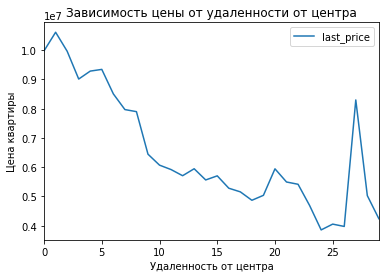

In [57]:
pivot_table_km = real_estate_clean.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_centers_nearest_km', 
                            values = 'last_price', aggfunc = 'mean')
display(pivot_table_km)
pivot_table_km.plot()
plt.title('Зависимость цены от удаленности от центра')
plt.xlabel('Удаленность от центра')
plt.ylabel('Цена квартиры')
plt.show()

Где график сильно меняется — это и будет центральная зона. В нашем случае центральная зона - это 9 км.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: **площадь, цена, число комнат, высота потолков.** Также выделим факторы, которые влияют на стоимость квартиры **(число комнат, этаж, удалённость от центра, дата размещения объявления).**

In [58]:
spb_center = real_estate_clean.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km <= 9')

In [59]:
spb_center['total_area'].describe()

count    4058.000000
mean       72.454719
std        30.607802
min        20.000000
25%        48.000000
50%        67.600000
75%        90.000000
max       197.200000
Name: total_area, dtype: float64

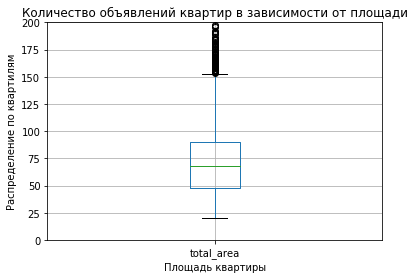

In [60]:
data_plot = spb_center[['total_area']]
data_plot.boxplot()
plt.title('Количество объявлений квартир в зависимости от площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Распределение по квартилям')
plt.ylim(0, 200)
plt.show()

- Минимальное значение - мы видим, что минимальное значение по нашей выборке примерно 20кв.м.
- Нижний квартиль - 25 % нашей выборки находится в пределах 48кв.м.
- Медиана - 50 % выборки, разделяет выборку на 2 равные части и равна 67.6 кв.м.
- Верхний квартиль равен 90кв.м.
- Максимальное значение площади квартиры равно 197кв.м.

In [61]:
spb_center['last_price'].describe().apply('{0:.5f}'.format)

count        4058.00000
mean      8572348.59759
std       3844480.19249
min       1600000.00000
25%       5700000.00000
50%       7765000.00000
75%      10800000.00000
max      20000000.00000
Name: last_price, dtype: object

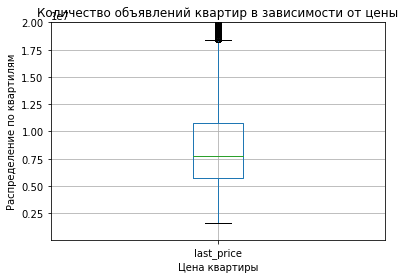

In [62]:
data_plot = spb_center[['last_price']]
data_plot.boxplot()
plt.title('Количество объявлений квартир в зависимости от цены')
plt.xlabel('Цена квартиры')
plt.ylabel('Распределение по квартилям')
plt.ylim(50000, 20000000)
plt.show()

- Минимальное значение - мы видим, что минимальное значение по нашей выборке примерно 1600000
- Нижний квартиль - 25 % нашей выборки находится в пределах 5700000
- Медиана - 50 % выборки, разделяет выборку на 2 равные части и равна 7765000
- Верхний квартиль равен 10800000
- Максимальное значение цены квартиры равно 20000000

In [63]:
spb_center['rooms'].describe()

count    4058.000000
mean        2.456629
std         1.132014
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: rooms, dtype: float64

In [64]:
spb_center['ceiling_height'].describe()

count    4058.000000
mean        2.859717
std         0.304070
min         2.000000
25%         2.650000
50%         2.700000
75%         3.000000
max         4.000000
Name: ceiling_height, dtype: float64

Проанализировав информацию о площади, цене, числе комнат и высоте потолков квартир в центре Санкт-Петербурга, можно сделать следующие выводы. <br>
- в общем виде средняя квартира в центре выглядит так: площадь квартиры 72кв.м, цена 8.5млн, высота потолков 2.9м. В основном преобладают двухкомнатные и трехкомнатные квартиры.

0.5160906229457642

Text(0, 0.5, 'Число комнат')

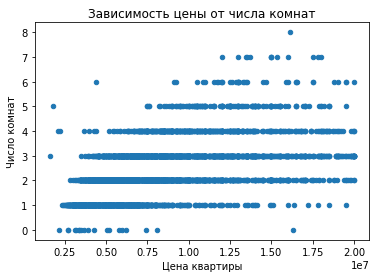

In [65]:
display(spb_center['last_price'].corr(spb_center['rooms']))
data_plot = spb_center.plot(x = 'last_price', y = 'rooms', kind = 'scatter')
plt.title('Зависимость цены от числа комнат')
data_plot.set_xlabel('Цена квартиры')
data_plot.set_ylabel('Число комнат')

In [66]:
spb_center.pivot_table(index = 'floor_category', values = 'last_price')

,last_price
floor_category,
другой,8.831213e+06
первый,6.817516e+06
последний,8.635112e+06


-0.26632917442930526

Text(0, 0.5, 'Цена квартиры')

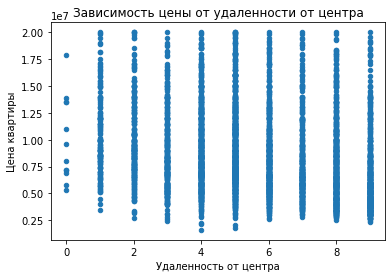

In [67]:
display(spb_center['last_price'].corr(spb_center['city_centers_nearest_km']))
data_plot = spb_center.plot(x = 'city_centers_nearest_km', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от удаленности от центра')
data_plot.set_xlabel('Удаленность от центра')
data_plot.set_ylabel('Цена квартиры')

-0.011725080550893033

0.002300962133404061

-0.026033059866692514

Text(0, 0.5, 'Цена квартиры')

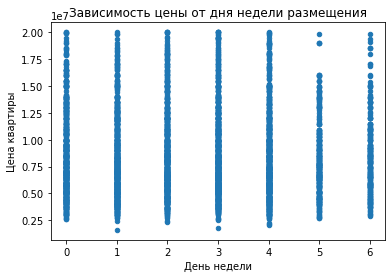

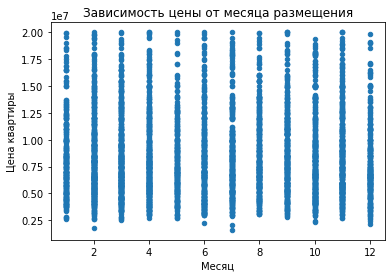

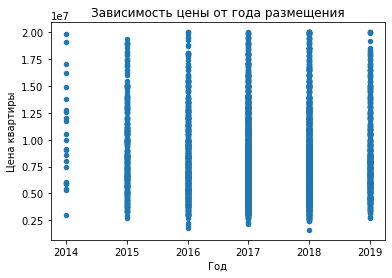

In [68]:
display(spb_center['last_price'].corr(spb_center['day_week']))
data_plot = spb_center.plot(x = 'day_week', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от дня недели размещения')
data_plot.set_xlabel('День недели')
data_plot.set_ylabel('Цена квартиры')

display(spb_center['last_price'].corr(spb_center['month']))
data_plot = spb_center.plot(x = 'month', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от месяца размещения')
data_plot.set_xlabel('Месяц')
data_plot.set_ylabel('Цена квартиры')

display(spb_center['last_price'].corr(spb_center['year']))
data_plot = spb_center.plot(x = 'year', y = 'last_price', kind = 'scatter')
plt.title('Зависимость цены от года размещения')
data_plot.set_xlabel('Год')
data_plot.set_ylabel('Цена квартиры')

Построим 2 матрицы корреляции: <br>
- для недвижимости Санкт-Петербурга и соседних населенных пунктов;
- для центра Санкт-Петербурга

In [69]:
real_estate_clean_corr = real_estate_clean.loc[:, ['total_area', 'last_price', 'price_per_meter', 'floor', 
                                                   'rooms', 'day_week', 'month', 'year']]
display(real_estate_clean_corr.corr())

spb_center_corr = spb_center.loc[:, ['total_area', 'last_price', 'price_per_meter', 'floor', 
                                                   'rooms', 'day_week', 'month', 'year']]
display(spb_center_corr.corr())

,total_area,last_price,price_per_meter,floor,rooms,day_week,month,year
total_area,1.000000,0.774223,0.067292,-0.033443,0.798366,-0.013828,0.006846,-0.073919
last_price,0.774223,1.000000,0.643160,0.090501,0.501950,-0.017389,0.005465,-0.023367
price_per_meter,0.067292,0.643160,1.000000,0.216567,-0.126012,-0.012555,-0.002661,0.056294
floor,-0.033443,0.090501,0.216567,1.000000,-0.166093,0.011681,0.017906,0.003873
rooms,0.798366,0.501950,-0.126012,-0.166093,1.000000,-0.003174,-0.004799,-0.043062
day_week,-0.013828,-0.017389,-0.012555,0.011681,-0.003174,1.000000,0.012360,-0.002724
month,0.006846,0.005465,-0.002661,0.017906,-0.004799,0.012360,1.000000,-0.268767
year,-0.073919,-0.023367,0.056294,0.003873,-0.043062,-0.002724,-0.268767,1.000000


,total_area,last_price,price_per_meter,floor,rooms,day_week,month,year
total_area,1.000000,0.757153,-0.200146,-0.022112,0.813214,-0.013542,0.002931,-0.096701
last_price,0.757153,1.000000,0.442612,0.086712,0.516091,-0.011725,0.002301,-0.026033
price_per_meter,-0.200146,0.442612,1.000000,0.160173,-0.326868,0.009174,-0.017316,0.093916
floor,-0.022112,0.086712,0.160173,1.000000,-0.132688,0.023375,-0.003434,0.012757
rooms,0.813214,0.516091,-0.326868,-0.132688,1.000000,-0.012664,-0.010527,-0.059349
day_week,-0.013542,-0.011725,0.009174,0.023375,-0.012664,1.000000,0.038622,0.002921
month,0.002931,0.002301,-0.017316,-0.003434,-0.010527,0.038622,1.000000,-0.249526
year,-0.096701,-0.026033,0.093916,0.012757,-0.059349,0.002921,-0.249526,1.000000


1. Чем больше площадь квартиры, тем выше цена (высокая корреляция как для центра, так и для нецентра)
2. Чем больше комнат, тем больше площадь и цена 
3. Чем больше стоимость квадратного метра, тем выше стоимость квартиры 
4. Этаж квартиры имеет небольшую зависимость от стоимости квадратного метра

## Вывод 
В центре Санкт-Петербурга квартиры стоят дороже, если они находятся ближе к центру города. На первом этаже квартиры стоят дешевле, чем на других. Чем больше комнат, тем выше цена. В пятницу и в выходные дни стоимость недвижимости ниже, чем в будние дни. В целом такие выводы не сильно отличаются от выводов по всем данным.

### Шаг 5. Общий вывод  <a class="anchor" id="conclusion"></a>

В результате работы были выявлены следующие инсайты.
#### 1. Инсайты по данным недвижимости Санкт-Петербурга и соседних населенных пунктов:
- **Изучение параметров** <br>
**Параметр: площадь квартиры.** Большинство значений лежало в диапазоне от 20 до 200кв.м. Среднее значение площади квартиры равно 60. Минимальные и максимальные значения площади квартиры составили 12кв.м. и 900кв.м. Убрали выбивающиеся значения по площади квартиры: *менее 20кв.м. и более 200кв.м.* <br>
**Параметр: цена квартиры.** Большая часть значений находилась в диапазоне от 500000 до 20 млн, что выглядело правдоподобно. Минимум равен 12190, что не могло быть правдой. Средняя стоимость квартиры равнялась 6.5млн. Выбивающиеся значения по цене квартиры: *менее 500т. и более 20млн.* <br>
**Параметр: число комнат.** Самые популярные квартиры в Санкт-Петербурге и в соседних населнных пунктах: однокомнатные и двухкомнатные. Анализировали *1-8комнатные квартиры.* <br>
**Параметр: высота потолков.** Большинство значений лежало в диапазоне от 2 до 4 метров, что выглядело правдоподобно. Выбивающиеся значения по высоте потолков: *менее 2 и более 4 метров.* <br>
**Параметр: время продажи.** Среднее значение по времени продажи квартиры - 169 дней, медиана - 95 дней. Продажа квартиры - довольно длительный процесс, обычно на продажу квартиры уходит около 100 дней. <br>

- **Факторы, влияющие на стоимость квартиры** <br>
**Зависимость цены от квадратного метра.** Чем больше площадь, тем выше стоимость. <br>
**Зависимость цены от числа комнат.** Чем больше комнат, тем выше цена. <br>
**Зависимость цены от этажа.** На первом этаже квартиры стоят дешевле, чем на других. <br>
**Зависимость цены от удаленности от центра.** Ближе к центру квартиры дороже. <br>
**Зависимость цены от даты размещения.** Существует небольшая связь цены от даты размещения: в субботу цена квартиры немного ниже, чем в другие дни. Месяц размещения объявления практически не влияет на стоимость квартиры: только в мае и июне есть небольшое снижение цен на квартиры. Это объясняется тем, что в летний период спрос на недвижимость падает.
Зависимость цены от года размещения также невысокая: лишь в 2014 стоимость квартиры была ниже, чем в последующие годы.

#### 2. Инсайты по данным недвижимости центра Санкт-Петербурга (в радиусе 9км):
- **Изучение параметров** <br>
**Параметр: площадь квартиры.** Минимальное значение площади квартиры равнялось 20кв.м. Максимальное - 197кв.м. <br>
**Параметр: цена квартиры.** Средняя стоимость квартиры равнялась 7.8млн. Квартиры в центре Санкт-Петербурга стоят дороже, чем в других населенных пунктах <br>
**Параметр: число комнат.** В основном преобладают двухкомнатные и трехкомнатные квартиры. <br>
**Параметр: высота потолков.** Средняя высота потолков 2.9м. <br>

- **Факторы, влияющие на стоимость квартиры** <br>
**Зависимость цены от числа комнат.** Чем больше комнат, тем выше цена. <br>
**Зависимость цены от этажа.** На первом этаже квартиры стоят дешевле, чем на других.<br>
**Зависимость цены от удаленности от центра.** В центре Санкт-Петербурга квартиры стоят дороже, если они находятся ближе к центру города.  <br>
**Зависимость цены от даты размещения.** В пятницу и в выходные дни стоимость недвижимости ниже, чем в будние дни. 